In [3]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics, preprocessing
from scipy import stats

%matplotlib inline

In [4]:
#get energy data from url
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df_energy = pd.read_csv(url, error_bad_lines=False)

#View the first 5 rows in the dataframe
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
#Rename the columns of the dataframe
column_names = {"date": "Date", "Appliances": "Appliances (Wh)", "lights": "Lights (Wh)", "T1": "Kitchen Temperature", "RH_1": "Kitchen Humidity",
                "T2": "Living Room Temperature", "RH_2": "Living Room Humidity", "T3": "Laundry Room Temperature", "RH_3": "Laundry Room Humidity",
                "T4": "Office Temperature", "RH_4": "Office Humidity", "T5": "Bathroom Temperature", "RH_5": "Bathroom Humidity",
                "T6": "Outside Building Temperature (North Side)", "RH_6": "Outside Building Humidity (North Side)", "T7": "Ironing Room Temperature", "RH_7": "Ironing Room Humidity",
                "T8": "Teenager Room_2 Temperature", "RH_8": "Teenager Room_2 Humidity", "T9": "Parents Room Temperature", "RH_9": "Parents Room Humidity",
                "T_out": "Outside Temperature (from CWS)", "Press_mm_hg": "Pressure mm_Hg (from CWS)", "RH_out": "Outside Humidity (from CWS)", "Windspeed": "Wind speed (m/s)(from CWS)",
                "Visibility": "Visibility (km)(from CWS)", "Tdewpoint": "Tdewpoint (from CWS)", "rv1": "Random variable 1", "rv2": "Random variable 2"
}
df_energy = df_energy.rename(columns = column_names)

In [6]:
#confirming the column name changes
df_energy.head()

,Date,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df_energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       19735 non-null  object 
 1   Appliances (Wh)                            19735 non-null  int64  
 2   Lights (Wh)                                19735 non-null  int64  
 3   Kitchen Temperature                        19735 non-null  float64
 4   Kitchen Humidity                           19735 non-null  float64
 5   Living Room Temperature                    19735 non-null  float64
 6   Living Room Humidity                       19735 non-null  float64
 7   Laundry Room Temperature                   19735 non-null  float64
 8   Laundry Room Humidity                      19735 non-null  float64
 9   Office Temperature                         19735 non-null  float64
 10  Office Humidity       

In [8]:
df_energy.describe()

,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
#checking the correlation between
df_energy.corr()

,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
Appliances (Wh),1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
Lights (Wh),0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Kitchen Temperature,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Kitchen Humidity,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Living Room Temperature,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Living Room Humidity,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Laundry Room Temperature,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Laundry Room Humidity,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Office Temperature,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Office Humidity,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [10]:
scaler = preprocessing.MinMaxScaler()

In [11]:
#create a new df without the "Date" and "Light" columns
subdf_energy = df_energy.drop(columns = ['Date', 'Lights (Wh)'])
subdf_energy

,Appliances (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,Bathroom Temperature,...,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [12]:
#scaling the values in the datarame and seperating the dependent variable from the independent variables
normalised_df = pd.DataFrame(scaler.fit_transform(subdf_energy), columns = subdf_energy.columns)
features = normalised_df.drop(columns = ["Appliances (Wh)"])
target_var = normalised_df["Appliances (Wh)"]

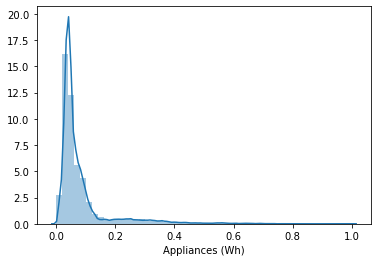

In [13]:
sns.distplot(normalised_df["Appliances (Wh)"])

In [14]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
#seleting the feature and label for the simple linear regression
x = features["Living Room Temperature"]
y = features['Outside Building Temperature (North Side)']

x= np.array([x]).reshape(-1,1)
x

array([[0.22534529],
       [0.22534529],
       [0.22534529],
       ...,
       [0.69265118],
       [0.67705355],
       [0.66617051]])

In [16]:
x_train, x_test, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
lm = LinearRegression()


In [18]:
lm.fit(x_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
slr_pred = lm.predict(x_test)

In [20]:
#getting the r2 score for the regression model
score = metrics.r2_score(ytest, slr_pred)

In [21]:
#rounding the score to 2 dp
score.round(2)

0.64

In [22]:
#set our X and y values
X = features
y = target_var

In [23]:
#Split our data into testing and training variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#iewing the intercept and weights of the linear regression model 
print(lm.intercept_)
print(lm.coef_)

0.15288462305884704
[-3.28105119e-03  5.53551235e-01 -2.36211206e-01 -4.56729593e-01
  2.90648102e-01  9.60567336e-02  2.89869038e-02  2.63897337e-02
 -1.56539880e-02  1.60037545e-02  2.36433121e-01  3.80520714e-02
  1.03141290e-02 -4.46039253e-02  1.02003320e-01 -1.57603074e-01
 -1.89945152e-01 -3.98036509e-02 -3.21852042e-01  6.84553091e-03
 -7.76635126e-02  2.91884972e-02  1.23042727e-02  1.17753906e-01
  2.31035306e+10 -2.31035306e+10]


In [26]:
pd.DataFrame(lm.coef_, X_train.columns, columns =["Coefficient"]).sort_values(by = "Coefficient")

,Coefficient
Random variable 2,-2.310353e+10
Living Room Humidity,-4.567296e-01
Outside Temperature (from CWS),-3.218520e-01
Living Room Temperature,-2.362112e-01
Parents Room Temperature,-1.899452e-01
Teenager Room_2 Humidity,-1.576031e-01
Outside Humidity (from CWS),-7.766351e-02
Ironing Room Humidity,-4.460393e-02
Parents Room Humidity,-3.980365e-02
Bathroom Temperature,-1.565399e-02


In [27]:
prediction = lm.predict(X_test)

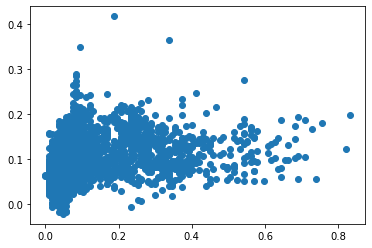

In [28]:
#scatter plot of actual values vs predicted values 
plt.scatter(y_test, prediction)

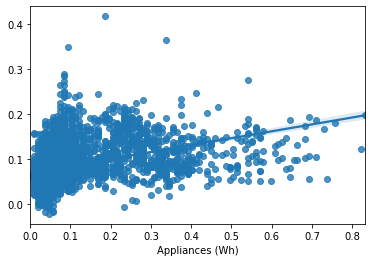

In [29]:
#regression line which shows non-linearity
sns.regplot(y_test, prediction)

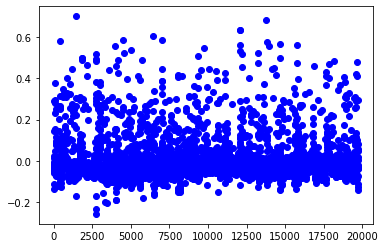

In [30]:
#reiduals plot which shows heteroscedasticity
plt.plot(y_test - prediction, "bo")

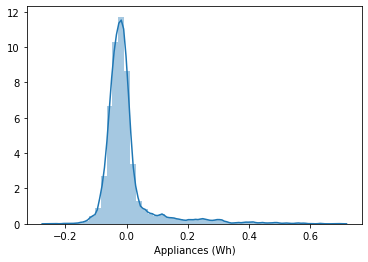

In [31]:
#normal distribution plot of residuals
sns.distplot((y_test - prediction), bins = 50)

In [32]:
#print to console the metrics for measuring the performance of the linear model

print ("The MAE is: ", metrics.mean_absolute_error(y_test, prediction).round(2))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)).round(3))
print ("The R^2 is: ", metrics.r2_score(y_test, prediction).round(2))
print ("The RSS is: ", np.sum(np.square(y_test, prediction)).round(2))

The MAE is:  0.05
The RMSE is:  0.088
The R^2 is:  0.15
The RSS is:  92.98


In [33]:
ridge_reg = Ridge(alpha = 0.04)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
#predict ridge regression values
ridge_pred = ridge_reg.predict(X_test)

#the metrics for measuring the performance of the ridge model
print ("The MAE is: ", metrics.mean_absolute_error(y_test, ridge_pred).round(2))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)).round(3))
print ("The R^2 is: ", metrics.r2_score(y_test, ridge_pred).round(2))
print ("The RSS is: ", np.sum(np.square(y_test, ridge_pred)).round(2))

The MAE is:  0.05
The RMSE is:  0.088
The R^2 is:  0.15
The RSS is:  92.98


In [35]:
lasso_reg = Lasso (alpha = 0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_pred = lasso_reg.predict(X_test)

#the metrics for measuring the performance of the lasso model
print ("The MAE is: ", metrics.mean_absolute_error(y_test, lasso_pred).round(2))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)).round(3))
print ("The R^2 is: ", metrics.r2_score(y_test, lasso_pred).round(2))
print ("The RSS is: ", np.sum(np.square(y_test, lasso_pred)).round(2))

The MAE is:  0.06
The RMSE is:  0.094
The R^2 is:  0.03
The RSS is:  92.98


In [37]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(lm, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Random variable 2,-2.310353e+10,0.000768,-0.000000
1,Living Room Humidity,-4.567296e-01,-0.451647,-0.000000
2,Outside Temperature (from CWS),-3.218520e-01,-0.314598,0.000000
3,Living Room Temperature,-2.362112e-01,-0.232308,0.000000
4,Parents Room Temperature,-1.899452e-01,-0.189862,-0.000000
5,Teenager Room_2 Humidity,-1.576031e-01,-0.157536,-0.000110
6,Outside Humidity (from CWS),-7.766351e-02,-0.074798,-0.049557
7,Ironing Room Humidity,-4.460393e-02,-0.044757,-0.000000
8,Parents Room Humidity,-3.980365e-02,-0.039977,-0.000000
9,Bathroom Temperature,-1.565399e-02,-0.016140,-0.000000
